In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from IPython.display import display, Image
sns.set_style("whitegrid")
%matplotlib inline

# Roadmap
- Show how much power we've generated using different power sources
- show the chemical equations for the relevant combustion reactions
- Calculate how many $CO_2$ molecules are produced per terrawatt energy
- Show and explain how $CO_2$ and other greenhouse gases store energy.


# What are Atoms? What are Molecules?

Atoms 

# How does $CO_2$ trap energy from the sun?

The short answer? After sunlight enters Earth's atmosphere, $CO_2$ acts like glass, reflecting a small fraction of that light back onto Earth, and some fraction of that light is absorbed into the Earth.

![image](graphics/greenhouse_effect_infographic_UNEP.jpg)

The short answer is correct, but it's just a summary of the conclusion reached through standard scientific investigation. It doesn't try to explain how any of these steps happen, it leaves a lot of valid questions unanswered (like why $CO_2$ has a bigger impact than other gases), and it hides all the observations that make it impossible to conclude that manmade $CO_2$ isn't responsible for the warming of the earth.  

This is my attempt at laying out everything you need to fully understand how $CO_2$ causes warming. So back to our question,

# How does $CO_2$ trap energy from the sun?

To fully answer this question, I first have to explain a few things about the important players (matter and light), and how they interact.

# Electrons, Atoms, and Molecules

All physical things we interact with are made of atoms or molecules (which are bonded atoms). 

In ancient Greece, some observant and philosphical Greeks noticed that everything in their world could be broken into smaller pieces, but they reasoned that at some point, after enough divisions, it would be impossible to divide that thing again. They named that indivisible piece the "atom". Around this time, some other observent Greeks noticed that amber would attract other small objects, like feathers, after fur rubbed against the amber. They had discovered static electricity, and this phenomenon took its name from the Greek word for amber: elektron. With these observations and concepts, we (humanity) worked through many theories about how electricity worked, and in 1896, we made a major discovery. J.J. Thompson's cathode ray tube experiments revealed that electrons were independent particles and their charge wasn't a fundamental property property of atoms. This discovery contradicted the existing definition of an atom, so we knew that there was more to learn about the atom. 

In 1911, Earnest Rutherford and his researchers performed the gold foil experiment, which showed that atoms have an extremly small, dense center, which they named the nucleus. Building off of this discovery, in 1917, Rutherford and his lab discovered that the hydrogen nucleus is present in other atoms of other elements, and this common part was named the "proton".

<img src="graphics/Hydrogen_atom.png" title="a hydrogen atom" style="width: 300px"/>

With the discoveries of the proton and the electron, we could explain why atoms could have internal charge while being electrically neutral, but some parallel discoveries in quantum mechanics indicated that protons alone wouldn't be able to contain electrons.

consist of Neutrons, Protons, and Electrons. The Neutrons and Protons are bound by an extremely strong force aptly named "the strong nuclear force" (this force is $10^38$ times as strong as gravity), and together, they form the nucleus of the atom. The number of protons determines what element the atom is. Protons each carry a positive charge. Neutrons do not carry charge (they are neutral). 

Electrons fly in orbit around the nucleaus. As shown in the helium atom diagram below, the cloud where the electron can be found is far (FAR!) larger than the nucleus. For reference, if the nucleus was the size of a quarter, electrons could be a bit more than 2 miles away.

<img src="graphics/Helium_atom_QM_Yzmo_wiki.png" title="a helium atom, image credit to wikipedia user Yzmo" style="width: 300px"/>

Electrons each carry a negative charge that is exactly the same magnitude as the proton's positive charge. We observe that opposite charges pull together and alike charges repel each other. If the number of protons matches the number of electrons, then the atom is electrically neutral, but the atom's electrons will all repel each other and spread apart around the nucleus. Electrons also have the property called 'spin' which has 2 possible values: spin up, and spin down.  



and for quantum-mechanical reasons (Heisenberg's uncertainty principle and the Pauli exclusion principle), they can only be in specific cloud-shaped regions called **orbitals**. 



![anim](graphics/co2_absorb_emit_infrared_anim_320x240.gif)

In [3]:
Image(url='co2_absorb_emit_infrared_anim_320x240.gif')

In [2]:
energy_by_src_df = pd.read_csv('our_world_in_data/primary-energy-consumption-by-source-and-region.csv')
long_energy_df = pd.read_csv('our_world_in_data/global-primary-energy-consumption.csv')

In [3]:
display(energy_by_src_df.head(5))
display(long_energy_df.head(5))

,Entity,Code,Year,Oil (tWh),Gas (tWh),Coal (tWh),Nuclear (tWh),Hydropower (tWh),Other renewables (tWh)
0,Africa,NaN,1965,316.777300,10.552653,335.590757,0.0,37.575804,0.0
1,Africa,NaN,1966,347.368863,11.788922,331.371978,0.0,41.181708,0.0
2,Africa,NaN,1967,344.129668,11.660342,341.010827,0.0,42.521929,0.0
3,Africa,NaN,1968,363.142507,11.901662,355.407259,0.0,49.007849,0.0
4,Africa,NaN,1969,368.629932,14.177457,357.506395,0.0,56.797097,0.0


,Entity,Code,Year,Solar (tWh),Other renewables (tWh),Nuclear (tWh),Hydropower (tWh),Natural gas (tWh),Crude oil (tWh),Coal (tWh),Traditional biofuels (tWh),Wind (tWh)
0,World,OWID_WRL,1800,NaN,NaN,NaN,NaN,NaN,NaN,97.22230,5555.555556,NaN
1,World,OWID_WRL,1810,NaN,NaN,NaN,NaN,NaN,NaN,127.77788,5833.333333,NaN
2,World,OWID_WRL,1820,NaN,NaN,NaN,NaN,NaN,NaN,152.77790,6111.111111,NaN
3,World,OWID_WRL,1830,NaN,NaN,NaN,NaN,NaN,NaN,263.88910,6388.888889,NaN
4,World,OWID_WRL,1840,NaN,NaN,NaN,NaN,NaN,NaN,355.55584,6944.444444,NaN


In [4]:
agg_e_by_s_df = energy_by_src_df[pd.isnull(energy_by_src_df['Code'])]
ctry_e_by_s_df = energy_by_src_df[~pd.isnull(energy_by_src_df['Code'])]
ctry_e_by_s_df = ctry_e_by_s_df[ctry_e_by_s_df['Code'] != 'OWID_WRL']
ctry_e_by_s_df['Year'] = pd.to_datetime(arg=ctry_e_by_s_df['Year'], format='%Y')
ctry_e_by_s_df.head(5)

,Entity,Code,Year,Oil (tWh),Gas (tWh),Coal (tWh),Nuclear (tWh),Hydropower (tWh),Other renewables (tWh)
52,Algeria,DZA,1965-01-01,14.99107,8.08285,0.81410,0.0,1.03507,0.0
53,Algeria,DZA,1966-01-01,19.68959,8.39686,0.79084,0.0,0.95366,0.0
54,Algeria,DZA,1967-01-01,18.35214,8.14100,0.60476,0.0,1.06996,0.0
55,Algeria,DZA,1968-01-01,19.56166,8.55968,0.63965,0.0,1.46538,0.0
56,Algeria,DZA,1969-01-01,20.64325,11.25784,0.81410,0.0,0.95366,0.0


In [5]:

# tmp = ctry_e_by_s_df.pivot(index='Code', columns='Year', values='Oil (tWh)')
# world_e_by_s_df = ctry_e_by_s_df[ctry_e_by_s_df['Code'] == 'OWID_WRL']

# tmp

In [6]:
ctry_indexed = ctry_e_by_s_df.set_index(['Code','Year'])
ctry_indexed
almost_right = ctry_e_by_s_df.pivot(index='Code', columns='Year').stack().T
# almost_right.reset_index().set_index(['Code','Year'])
almost_right
# tmp = ctry_e_by_s_df.pivot(index='Code', columns='Year').reset_index()
# tmp.melt(col_level=0, id_vars='Code', value_vars = ['Oil (terrawatt-hours)', 'Gas (terrawatt-hours)', 'Coal (terawatt-hours)',
#                        'Nuclear (terrawatt-hours)', 'Hydropower (terrawatt-hours)',
#                        'Other renewables (terrawatt-hours)'])
# ctry_e_by_s_df.pivot(index='Code', columns='Year').reset_index()
# tmp.melt(col_level=0, id_vars='Code')

Code                                     ARE                        \
Year                              1965-01-01            1966-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                           0.819587              0.878249   
Gas (tWh)                                  0                     0   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1967-01-01            1968-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                           0.948241               1.06118   
Gas (tWh)                            4.75667                6.2802   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1969-01-01            1970-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                            1.17591               1.35668   
Gas (tWh)                            6.17553               8.79228   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1971-01-01            1972-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                            1.58168               2.08177   
Gas (tWh)                            13.9211               14.4445   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                                                                \
Year                              1973-01-01            1974-01-01   
Entity                  United Arab Emirates  United Arab Emirates   
Oil (tWh)                             3.2564               4.51244   
Gas (tWh)                            18.1079               18.8406   
Coal (tWh)                                 0                     0   
Nuclear (tWh)                              0                     0   
Hydropower (tWh)                           0                     0   
Other renewables (tWh)                     0                     0   

Code                        ...                ZAF                \
Year                        ...         2007-01-01    2008-01-01   
Entity                      ...       South Africa  South Africa   
Oil (tWh)                   ...            299.685       284.093   
Gas (tWh)                   ...            36.5966       39.1435   
Coal (tWh)                  ...            972.977        1085.5   
Nuclear (tWh)               ...            29.7816       34.2211   
Hydropower (tWh)            ...            2.28421       3.16579   
Other renewables (tWh)      ...           0.805821      0.840032   

Code                                                              \
Year                      2009-01-01    2010-01-01    2011-01-01   
Entity                  South Africa  South Africa  South Africa   
Oil (tWh)                   

In [7]:
# ctry_e_by_s_json = {}
# # ctry_e_by_s_df.groupby(['Code'], axis=1)
# for i in 
# help(pd.DataFrame.pivot_table)
ctry_piv_df = ctry_e_by_s_df.pivot_table(index=['Entity','Code','Year'])
year_piv_df = ctry_e_by_s_df.pivot_table(index=['Year'])
display(year_piv_df.head(5))

long_year_piv = long_energy_df.pivot_table(index=['Year'])
display(long_year_piv.head(5))

,Coal (tWh),Gas (tWh),Hydropower (tWh),Nuclear (tWh),Oil (tWh),Other renewables (tWh)
Year,,,,,,
1965-01-01,266.922483,111.588862,38.762439,1.131004,290.320426,0.220175
1966-01-01,270.019738,121.394759,41.515616,1.515977,312.674197,0.270395
1967-01-01,265.632215,130.149029,42.444747,1.858327,335.050036,0.281798
1968-01-01,269.396422,141.695667,44.505498,2.302855,364.199881,0.317719
1969-01-01,277.800957,155.418209,47.024845,2.780165,395.615988,0.347061


,Coal (tWh),Crude oil (tWh),Hydropower (tWh),Natural gas (tWh),Nuclear (tWh),Other renewables (tWh),Solar (tWh),Traditional biofuels (tWh),Wind (tWh)
Year,,,,,,,,,
1800,97.22230,NaN,NaN,NaN,NaN,NaN,NaN,5555.555556,NaN
1810,127.77788,NaN,NaN,NaN,NaN,NaN,NaN,5833.333333,NaN
1820,152.77790,NaN,NaN,NaN,NaN,NaN,NaN,6111.111111,NaN
1830,263.88910,NaN,NaN,NaN,NaN,NaN,NaN,6388.888889,NaN
1840,355.55584,NaN,NaN,NaN,NaN,NaN,NaN,6944.444444,NaN


Index(['Coal (tWh)', 'Gas (tWh)', 'Hydropower (tWh)', 'Nuclear (tWh)',
       'Oil (tWh)', 'Other renewables (tWh)'],
      dtype='object')

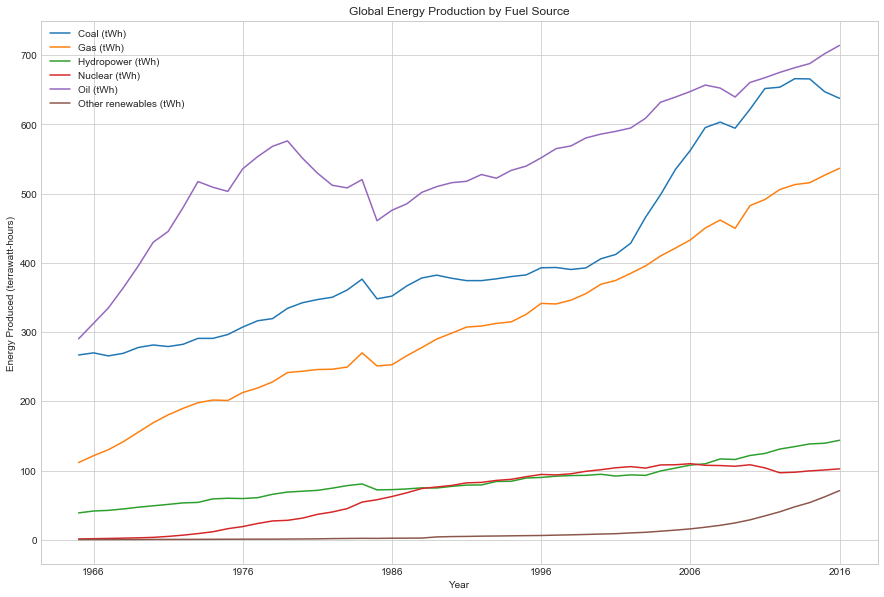

In [8]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(year_piv_df['Coal (tWh)'])
ax.plot(year_piv_df['Gas (tWh)'])
ax.plot(year_piv_df['Hydropower (tWh)'])
ax.plot(year_piv_df['Nuclear (tWh)'])
ax.plot(year_piv_df['Oil (tWh)'])
ax.plot(year_piv_df['Other renewables (tWh)'])
ax.set_xlabel('Year')
ax.set_ylabel('Energy Produced (terrawatt-hours)')
ax.set_title('Global Energy Production by Fuel Source')
ax.legend()
year_piv_df.columns


Index(['Coal (tWh)', 'Gas (tWh)', 'Hydropower (tWh)', 'Nuclear (tWh)',
       'Oil (tWh)', 'Other renewables (tWh)'],
      dtype='object')

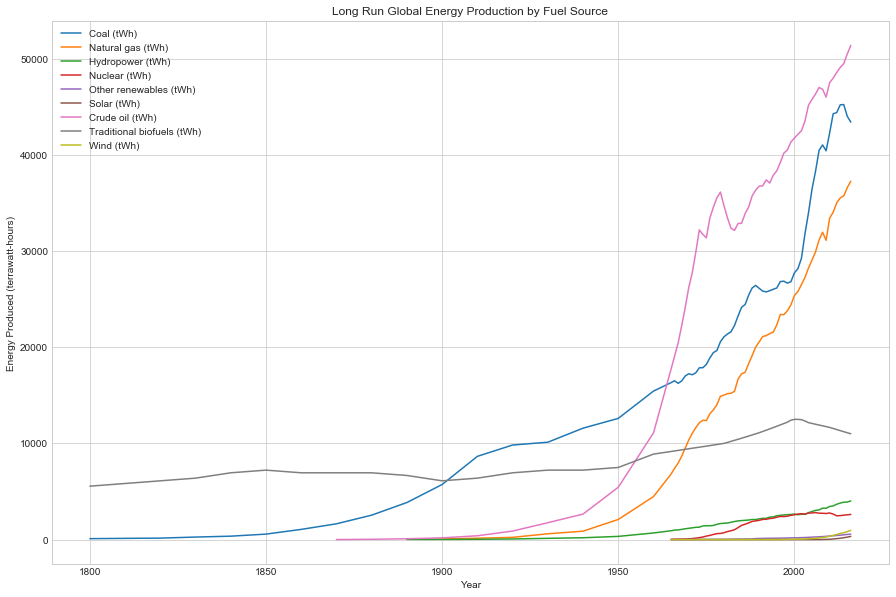

In [9]:
long_energy_df.columns
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.plot(long_year_piv['Coal (tWh)'])
ax.plot(long_year_piv['Natural gas (tWh)'])
ax.plot(long_year_piv['Hydropower (tWh)'])
ax.plot(long_year_piv['Nuclear (tWh)'])
# ax.plot(long_year_piv['Oil (tWh)'])
ax.plot(long_year_piv['Other renewables (tWh)'])
ax.plot(long_year_piv['Solar (tWh)'])
ax.plot(long_year_piv['Crude oil (tWh)'])
ax.plot(long_year_piv['Traditional biofuels (tWh)'])
ax.plot(long_year_piv['Wind (tWh)'])
ax.set_xlabel('Year')
ax.set_ylabel('Energy Produced (terrawatt-hours)')
ax.set_title('Long Run Global Energy Production by Fuel Source')
ax.legend()
year_piv_df.columns


In [10]:
pd.set_option('display.width', 150)

Energy conversion:
Our charts show energy production in units of terrawatt-hours, which is a measure of power per time, specifically  $10^9$ watts for 1 hour. 
$1 W = 1 \frac{J}{s}$
$1 tWh = 10^9 W \times 1 hr = 10^9 \frac{J}{s} \times 1 hr \times 3600 \frac{s}{hr} = 3.6*10^{12} J$


Fuel Sources:

Every hydrocarbon combustion reaction will have the form:

$C_xH_y + O_2 \rightarrow CO_2 + H_2O$

Coal:
* Bituminous Coal$^{1,2}$: $C_{137}H_{97}O_9NS$, energy released by combustion: $25.0 - 33.4$ MJ/kg   
* Anthracite Coal$^{1,2}$: $C_{240}H_{90}O_4NS$, energy released by combustion: $30.1$ MJ/kg   
* Lignite Coal$^2$: energy released by combustion: $16.1$ MJ/kg

In addition to the standard combustion reaction components above, the other elements will form$^3$ $SO_2$ and $N_2$ or $NO_2$

Balancing the equations for Bituminous and Anthracite Coal (and assuming the nitrogenous biproduct is $N_2$, it doesn't change the $CO_2$ output), we get:

* Bituminous: $4 C_{137}H_{97}O_9NS + 631 O_2 \rightarrow 548 CO_2 + 194 H_2O + 4 SO_2 + 2 N_2 $
* Molar Mass for $C_{137}H_{97}O_9NS$:  $1933.30 \frac{g}{mol}$


* Anthracite: $2 C_{240}H_{90}O_4NS + 523 O_2 \rightarrow 480 CO_2 + 90 H_2O + 2 SO_2 + 1 N_2 $
* Molar Mass for $C_{240}H_{90}O_4NS$:  $3083.35 \frac{g}{mol}$

| Coal Type  | Chemical Formula | Molar Mass $\frac{g}{mol}$ |   Balanced Combustion Equation    |
| ---------- | ---------------- | -------------------------- | --------------------------------- |
| Bituminous |$C_{137}H_{97}O_9NS$| 1933.30 |$4 C_{137}H_{97}O_9NS + 631 O_2 \rightarrow 548 CO_2 + 194 H_2O + 4 SO_2 + 2 N_2 $|
| Anthracite |$C_{240}H_{90}O_4NS$| 3083.35 |$2 C_{240}H_{90}O_4NS + 523 O_2 \rightarrow 480 CO_2 + 90 H_2O + 2 SO_2 + 1 N_2 $|


Gas:



Sources:

- 1: (http://chemed.chem.purdue.edu/genchem/topicreview/bp/1organic/coal.html)
- 2: (https://engineering.dartmouth.edu/~d30345d/books/Numbers/Chap3-Energy.pdf)
- 3: (http://environ.andrew.cmu.edu/m3/s3/09fossil.shtml)

In [10]:
names = ['Height [km]', 'O, cm-3', 'N2, cm-3', 'O2, cm-3', 'Mass_density, g/cm-3',
         'Temperature_neutral, K', 'Temperature_exospheric, K', 'He, cm-3',
         'Ar, cm-3', 'H, cm-3','N, cm-3', 'F10_7_daily']
atmos_comp = pd.read_table('nasa_msis_atmosphere_composition_data_12_08.txt', header=None, skiprows=39,
                           delim_whitespace=True, names=names, index_col='Height [km]')
# atmos_comp.set_index(names[0])
atmos_comp.drop(['F10_7_daily'], axis=1, inplace=True)
display(atmos_comp.head(5))
# help(pd.DataFrame.drop)

,"O, cm-3","N2, cm-3","O2, cm-3","Mass_density, g/cm-3","Temperature_neutral, K","Temperature_exospheric, K","He, cm-3","Ar, cm-3","H, cm-3","N, cm-3"
Height [km],,,,,,,,,,
0.0,0.0,2.053000e+19,5.508000e+18,0.001263,282.0,1027,1.378000e+14,2.456000e+17,0.0,0.0
1.0,0.0,1.839000e+19,4.932000e+18,0.001131,278.9,1027,1.234000e+14,2.199000e+17,0.0,0.0
2.0,0.0,1.655000e+19,4.440000e+18,0.001018,273.8,1027,1.111000e+14,1.980000e+17,0.0,0.0
3.0,0.0,1.494000e+19,4.008000e+18,0.000919,267.4,1027,1.003000e+14,1.787000e+17,0.0,0.0
4.0,0.0,1.349000e+19,3.619000e+18,0.000830,260.3,1027,9.053000e+13,1.614000e+17,0.0,0.0


In [12]:
# atmos_comp['O, cm-3'].index
atmos_comp.columns

Index(['O, cm-3', 'N2, cm-3', 'O2, cm-3', 'Mass_density, g/cm-3', 'Temperature_neutral, K', 'Temperature_exospheric, K', 'He, cm-3', 'Ar, cm-3',
       'H, cm-3', 'N, cm-3'],
      dtype='object')

In [13]:
# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111)
# ax.plot(atmos_comp['O, cm-3'])
# ax.plot(atmos_comp['N2, cm-3'])
# ax.plot(atmos_comp['O2, cm-3'])
# ax.plot(atmos_comp[ 'He, cm-3'])
# ax.plot(atmos_comp[ 'Ar, cm-3'])
# ax.plot(atmos_comp[ 'H, cm-3'])
# ax.plot(atmos_comp[ 'N, cm-3'])
# ax.set_xlabel('Height')
# ax.set_ylabel('Molecules per Cubic Centimeter')
# ax.set_title('Atmospheric Air Composition and Density')
# ax.legend()

In [14]:
# atmos_comp['Mass_density, g/cm-3'].map(lambda x: )

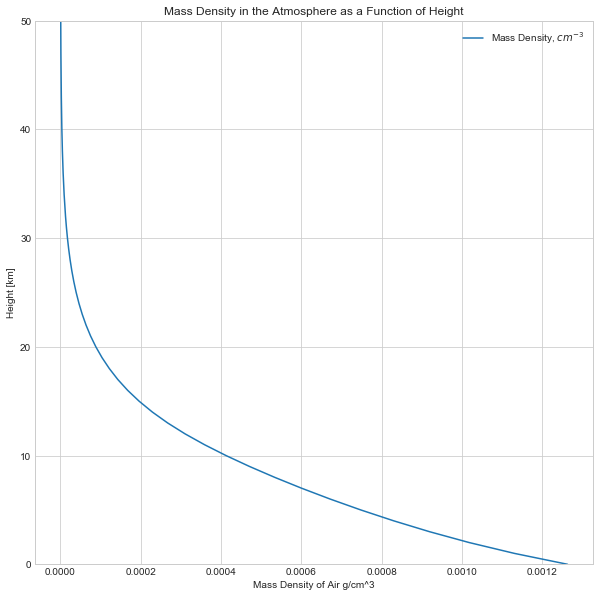

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(atmos_comp['Mass_density, g/cm-3'].values, atmos_comp['Mass_density, g/cm-3'].index, label='Mass Density, $cm^{-3}$')
ax.set(ylim=[0, 50])
ax.set_ylabel('Height [km]')
ax.set_xlabel('Mass Density of Air g/cm^3')
ax.set_title('Mass Density in the Atmosphere as a Function of Height')
ax.legend()

In [16]:
def density_below_height(height):
    gas_density = atmos_comp['Mass_density, g/cm-3']
    density_total = np.trapz(gas_density.values, gas_density.index)
    density_ht = np.trapz(gas_density.values[0:height], gas_density.index[0:height])
    density_pct = 100*density_ht / density_total
    print('{:3.3f}%'.format(density_pct) + ' of Earth\'s air (by mass) is in the first ' +
         str(height) + ' km from Earth\'s surface')
    
density_below_height(10)
density_below_height(20)
density_below_height(30)
density_below_height(40)
density_below_height(50)
density_below_height(55)

69.902% of Earth's air (by mass) is in the first 10 km from Earth's surface
93.735% of Earth's air (by mass) is in the first 20 km from Earth's surface
98.677% of Earth's air (by mass) is in the first 30 km from Earth's surface
99.685% of Earth's air (by mass) is in the first 40 km from Earth's surface
99.915% of Earth's air (by mass) is in the first 50 km from Earth's surface
99.956% of Earth's air (by mass) is in the first 55 km from Earth's surface


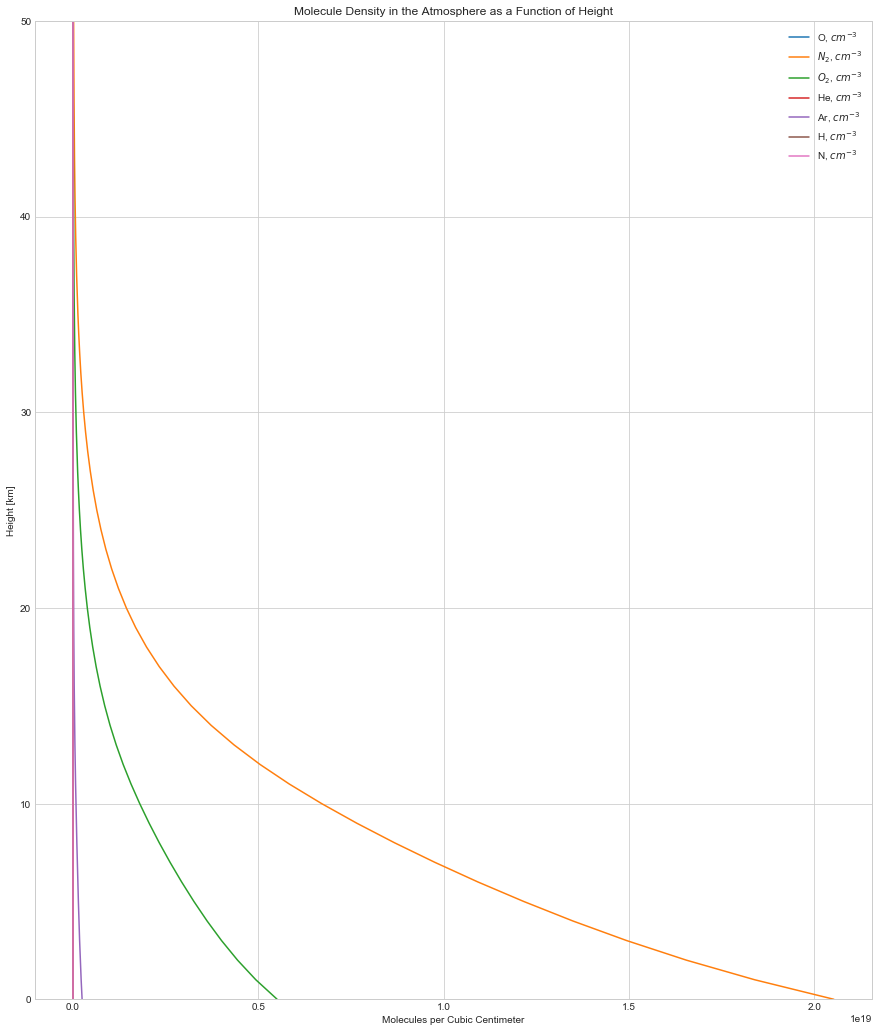

In [26]:
fig = plt.figure(figsize=(15,18))
ax = fig.add_subplot(111)
ax.plot(atmos_comp['O, cm-3'].values, atmos_comp['O, cm-3'].index, label='O, $cm^{-3}$')
ax.plot(atmos_comp['N2, cm-3'].values, atmos_comp['N2, cm-3'].index, label='$N_2$, $cm^{-3}$')
ax.plot(atmos_comp['O2, cm-3'].values, atmos_comp['O2, cm-3'].index, label='$O_2$, $cm^{-3}$')
ax.plot(atmos_comp['He, cm-3'].values, atmos_comp['He, cm-3'].index, label='He, $cm^{-3}$')
ax.plot(atmos_comp['Ar, cm-3'].values, atmos_comp['Ar, cm-3'].index, label='Ar, $cm^{-3}$')
ax.plot(atmos_comp['H, cm-3'].values, atmos_comp['H, cm-3'].index, label='H, $cm^{-3}$')
ax.plot(atmos_comp['N, cm-3'].values, atmos_comp['N, cm-3'].index, label='N, $cm^{-3}$')
ax.set(ylim=[0, 50])
ax.set_ylabel('Height [km]')
ax.set_xlabel('Molecules per Cubic Centimeter')
ax.set_title('Molecule Density in the Atmosphere as a Function of Height')
ax.legend()

In [17]:
atmos_comp.columns
mod_cols = ['O, cm-3', 'N2, cm-3', 'O2, cm-3', 'Mass_density, g/cm-3',
            'Temperature_neutral, K', 'Temperature_exospheric, K', 'He, cm-3',
            'Ar, cm-3', 'H, cm-3', 'N, cm-3']
atmos_mols = atmos_comp.copy()
# TODO: convert appropriate columns to grams/cm3

In [27]:
def pct_below_height(gas_df, height=[5,10,20,30,40,50], gas_names=['O','N2','O2','He','Ar','H','N'], print_results=False):
    results = []
    for ht in height:
        for gas in gas_names:
            gas_name = gas + ', cm-3'
            num_mols_max_ht = np.trapz(gas_df[gas_name].values, gas_df[gas_name].index)
            num_mols_height = np.trapz(gas_df[gas_name].values[0:ht], gas_df[gas_name].index[0:ht])
            pct_below = int(10000*num_mols_height/num_mols_max_ht)/100  # to sidestep some floating point nonsense
            if print_results:
                print(str(pct_below) + '% of the ' + str(gas) + ' molecules in Earths atmosphere are in the first ' 
                      + str(height) + 'km of Earth\'s surface')
                print('There are ' + '{:.3E}'.format(10**15 * num_mols_height) + ' ' + gas + 
                      ' molecules per square km of Earth\'s surface in the first ' + str(ht) + ' km \n')
            results.append((gas, ht, pct_below, num_mols_height, num_mols_max_ht))
    return results

def pretty_printer_heights(results):
    print('| {:3s} | {:6s} | {:7s} | {:16s} | {:15s} |'
          .format('Gas', 'Height', '% below', 'Molecules below', 'Molecules below'))
    print('| {:3s} | {:6s} | {:7s} | {:16s} | {:15s} |'
          .format('', '', 'Height', 'Height per sq km', '200km per sq km'))
    print('| --- | ------ | ------- | ---------------- | --------------- |')
    for res in results:
        print('|  {:>2s} | {:3d} km | {:5.2f} % | {:13.4E}    | {:12.4E}    |'
          .format(res[0], res[1], res[2], res[3], res[4]))
    print('---------------------------------------------------------------')

In [28]:
test_heights = [5,10,15,20,25,30,35,40,45,50,55]
test_gases = ['N2','O2','Ar','He','O', 'H', 'N'] # leaving out the atomic elemnts, O, H, and N
tmp_results = pct_below_height(atmos_comp, test_heights, test_gases)
pretty_printer_heights(tmp_results)


| Gas | Height | % below | Molecules below  | Molecules below |
|     |        | Height  | Height per sq km | 200km per sq km |
| --- | ------ | ------- | ---------------- | --------------- |
|  N2 |   5 km | 39.29 % |    6.6890E+19    |   1.7021E+20    |
|  O2 |   5 km | 39.29 % |    1.7944E+19    |   4.5661E+19    |
|  Ar |   5 km | 39.29 % |    8.0010E+17    |   2.0359E+18    |
|  He |   5 km | 39.30 % |    4.4896E+14    |   1.1423E+15    |
|   O |   5 km |  0.00 % |    0.0000E+00    |   1.5503E+13    |
|   H |   5 km |  0.00 % |    0.0000E+00    |   1.9069E+09    |
|   N |   5 km |  0.00 % |    0.0000E+00    |   5.7207E+08    |
|  N2 |  10 km | 69.90 % |    1.1898E+20    |   1.7021E+20    |
|  O2 |  10 km | 69.90 % |    3.1918E+19    |   4.5661E+19    |
|  Ar |  10 km | 69.90 % |    1.4232E+18    |   2.0359E+18    |
|  He |  10 km | 69.90 % |    7.9853E+14    |   1.1423E+15    |
|   O |  10 km |  0.00 % |    0.0000E+00    |   1.5503E+13    |
|   H |  10 km |  0.00 % |    0.0000E+00

In [29]:
N2_O2_HE_Ar_O_H_N_cts = [1.7021*10**20, 4.5661*10**19, 2.0359*10**18, 1.1423*10**15, 1.5503*10**13, 1.9069*10**9, 5.7207*10**8]
N2_O2_HE_Ar_O_H_N_pct = [100*count/sum(N2_O2_HE_Ar_O_H_N_cts) for count in N2_O2_HE_Ar_O_H_N_cts]
print('N2 makes up about ' + '{:<14.2f}'.format(N2_O2_HE_Ar_O_H_N_pct[0]) + ' percent of the atmosphere, or ' +
     '{:>9.0f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[0]*10000))
print('O2 makes up about ' + '{:<14.2f}'.format(N2_O2_HE_Ar_O_H_N_pct[1]) + ' percent of the atmosphere, or ' +
     '{:>9.0f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[1]*10000))
print('Ar makes up about ' + ' {:<13.2f}'.format(N2_O2_HE_Ar_O_H_N_pct[2]) + ' percent of the atmosphere, or ' +
     '{:>9.0f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[2]*10000))
print('He makes up about ' + ' {:<13.6f}'.format(N2_O2_HE_Ar_O_H_N_pct[3]) + ' percent of the atmosphere, or ' +
     '{:>9.0f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[3]*10000))
print(' O makes up about ' + ' {:<13.8f}'.format(N2_O2_HE_Ar_O_H_N_pct[4]) + ' percent of the atmosphere, or ' +
     '{:>9.4f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[4]*10000))
print(' H makes up about ' + ' {:5.11f}'.format(N2_O2_HE_Ar_O_H_N_pct[5]) + ' percent of the atmosphere, or ' + 
     '{:>7.7f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[5]*10000))
print(' N makes up about ' + ' {:5.11f}'.format(N2_O2_HE_Ar_O_H_N_pct[6]) + ' percent of the atmosphere, or ' +
     '{:>7.7f} ppm'.format(N2_O2_HE_Ar_O_H_N_pct[6]*10000))

N2 makes up about 78.11          percent of the atmosphere, or    781109 ppm
O2 makes up about 20.95          percent of the atmosphere, or    209543 ppm
Ar makes up about  0.93          percent of the atmosphere, or      9343 ppm
He makes up about  0.000524      percent of the atmosphere, or         5 ppm
 O makes up about  0.00000711    percent of the atmosphere, or    0.0711 ppm
 H makes up about  0.00000000088 percent of the atmosphere, or 0.0000088 ppm
 N makes up about  0.00000000026 percent of the atmosphere, or 0.0000026 ppm


Avogadro's Number = $6.022 \times 10^{23}$ molecules in a mole

| Molecule | Component Masses | Molar Mass $\Big[\frac{g}{mol}\Big]$| Density at STP $\Big[\frac{g}{m^3}\Big]$ |
| --- | --- | --- | --- |
| $N_2$ | $N = 14.01 \frac{g}{N_{atom}}$ | $28.02$ | 1250.6 |
| $O_2$ | $O = 16.00 \frac{g}{O_{atom}}$ | $32.00$ | 1429.0 |
| $Ar$ | $Ar = 39.95 \frac{g}{Ar_{atom}}$ | $39.95$ | 1783.7 |
| $He$ | $He = 4.003 \frac{g}{He_{atom}}$ | $4.003$ | 178.5 |
| $O$ | $O = 16.00 \frac{g}{O_{atom}}$ | $16.00$ | N/R |
| $H$ | $H = 1.008 \frac{g}{H_{atom}}$ | $1.008$ | N/R |
| $N$ | $N = 14.01\frac{g}{N_{atom}}$ | $14.01$ | N/R |

In [25]:
# fig = plt.figure(figsize=(6,6))
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each
    wedge is given by ``x/sum(x)``.  If ``sum(x) <= 1``, then the
    values of x give the fractional area directly and the array
    will not be normalized.  The wedges are plotted
    counterclockwise, by default starting from the x-axis.
    
    Parameters
    ----------
    x : array-like
        The input array used to make the pie chart.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the
        fraction of the radius with which to offset each wedge.
    
    labels : list, optional, default: None
        A sequence of strings provid

From the plots and tables, we can see a couple important things, namely:
- $O_2$ and $N_2$ are the most common molecules by far, with $N_2$ and $O_2$ making up $78.1\%$ and $20.95\%$ of the atmosphere respectively. That leaves $0.94\%$ for all other gases. 
- We also see that $Ar$ makes up $0.9343\%$ of the atmosphere, so after accounting for Oxygen, Nitrogen, and Argon, all other gases combined make up $0.0057\%$ of the atmosphere! 
- The relative proportions of gases don't change over (at least) the first 55 km above Earth, indicating the heavier molecules are well mixed    
- 
We also see that the majority of the molecules are below 10 km.

Radius of earth: $6.3781 \times 10^6 m $

CO2 density $\rho_{CO_2} = 1.98 \frac{kg}{m^3}$ (wikipedia)
$O_2$ density $\rho_{O_2} = 1.429 \frac{g}{L} = 0.001429 \frac{kg}{L} = 1.429 \frac{kg}{m^3}$ (wikipedia + math)

So $CO_2$ has a higher density than $O_2$

    
* 1: (https://en.wikipedia.org/wiki/Earth_radius#cite_note-IAU_XXIX-1)
* 2: (http://wordpress.mrreid.org/2014/08/01/the-composition-of-earths-atmosphere-with-elevation/)
* https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php

TODO:
- Find more information about CO2 concentrations at different altitudes.
- estimate the volume of air on the surface of the earth as a function of height. 


In [13]:
# help(pd.melt)
# help(pd.pivot)
# help(pd.read_csv)
# help(pd.DataFrame.groupby)
# help(pd.DataFrame.drop)
# help(pd.DataFrame)
# help(pd.DataFrame.set_index)
# help(plt.plot)
# help(pd.set_option)
help(pd.core.config)

Help on module pandas.core.config in pandas.core:

NAME
    pandas.core.config

DESCRIPTION
    The config module holds package-wide configurables and provides
    a uniform API for working with them.
    
    Overview
    
    This module supports the following requirements:
    - options are referenced using keys in dot.notation, e.g. "x.y.option - z".
    - keys are case-insensitive.
    - functions should accept partial/regex keys, when unambiguous.
    - options can be registered by modules at import time.
    - options can be registered at init-time (via core.config_init)
    - options have a default value, and (optionally) a description and
      validation function associated with them.
    - options can be deprecated, in which case referencing them
      should produce a warning.
    - deprecated options can optionally be rerouted to a replacement
      so that accessing a deprecated option reroutes to a differently
      named option.
    - options can be reset to their defau

In [13]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [14]:
df

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM
